In [145]:
# Analiza i modyfikacja danych
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ewaluacja
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import balanced_accuracy_score

models = [DecisionTreeClassifier(class_weight='balanced'), RandomForestClassifier(class_weight='balanced'), KNeighborsClassifier(), GaussianNB(),MLPClassifier(random_state=1, max_iter=300) ]
models_names = ['Tree', 'Random forest', 'K Neighbours', 'Naive Bayes', 'MLP']


def read_grouped_data():
    df = pd.read_csv('data/one_hour_data_extended.csv')
    return df.drop(columns=df.columns[0], axis=1)


def calculate_feeling_rate_distribution(df):
    print('DATA:')
    count = df.count()[0]
    data = []
    numbers = df['feeling_rate'].unique()
    for i in numbers:
        occur = df['feeling_rate'].value_counts()[i]
        percent = (occur / count) * 100
        value = round(percent, 2)
        data.append(value)
        print(str(i) + ' ' + str(round(percent, 2)) + '%')
        
    fig, ax = plt.subplots()
    ax.pie(data, labels=numbers, autopct='%1.1f%%')


def print_df_information(df):
    print(df.head())
    print(df.info())
    print(df.describe())


def change_txt_data(df):
    print(df.describe(include=['O']))
    categoricals = list(df.select_dtypes(include=['O']).columns)
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[categoricals])
    train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))
    df = pd.concat((df, train_ohe), axis=1).drop(categoricals, axis=1)
    print(df.head())
    return df

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


def print_balanced_accuracy(balanced_accuracy, balanced_method_name, y):
    plt.bar(models_names, balanced_accuracy)
    addlabels(models_names,balanced_accuracy)

    #giving title to the plot
    plt.title(balanced_method_name)
     
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel(y)
    plt.show


        gender
count     5665
unique       2
top     female
freq      3827
   steps  steps_so_far  heart_rate  min_heart  max_heart  raw_intensity  \
0      0             0      115.00      115.0      115.0          16.00   
1    181           181       91.98      115.0       80.0          37.96   
2     65           246       85.43       96.0       80.0          36.16   
3     35           281       87.56       96.0       80.0          33.18   
4    397           678       84.00       96.0       80.0          49.94   

   feeling_rate  time_of_day  female  male  
0             4            3     1.0   0.0  
1             4            4     1.0   0.0  
2             4            4     1.0   0.0  
3             4            4     1.0   0.0  
4             4            4     1.0   0.0  
DATA:
4 63.25%
3 22.35%
2 3.12%
5 9.02%
1 2.26%


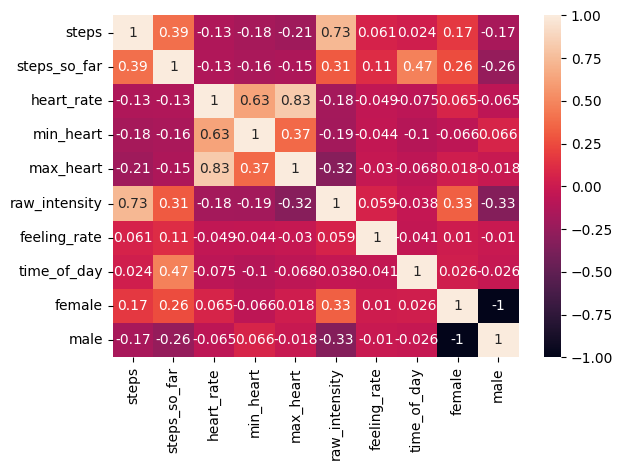

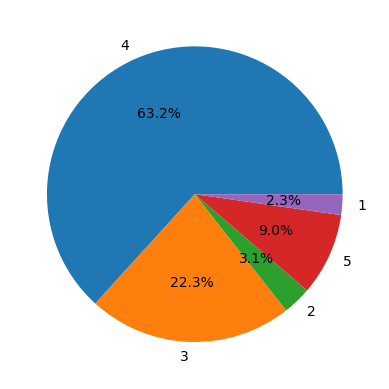

In [146]:

#train_df = read_raw_data()
train_df = read_grouped_data()
train_df = change_txt_data(train_df)
#train_df = change_txt_data(train_df)
Y = train_df['feeling_rate'].values
X = train_df.drop(['feeling_rate'], axis=1).values

sns.heatmap(train_df.corr(), annot=True)
plt.tight_layout()

calculate_feeling_rate_distribution(train_df)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)



DATA:
4 63.25%
3 22.35%
2 3.12%
5 9.02%
1 2.26%


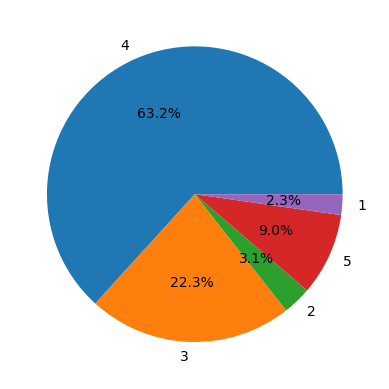

In [147]:
calculate_feeling_rate_distribution(train_df)

DecisionTreeClassifier(class_weight='balanced')
0.28988145570859136
RandomForestClassifier(class_weight='balanced')
0.24196653414536967
KNeighborsClassifier()
0.24126823619937512
GaussianNB()
0.23183252094101864
MLPClassifier(max_iter=300, random_state=1)


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

0.19674753722416083


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificatio

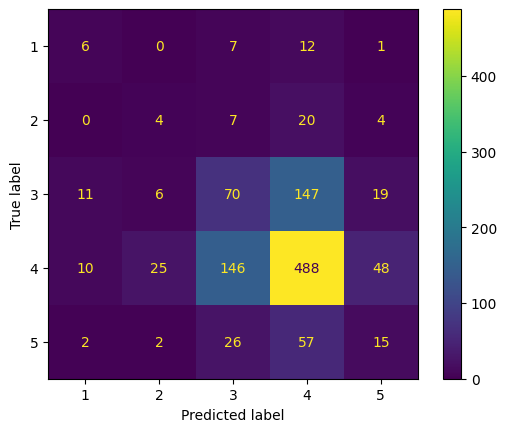

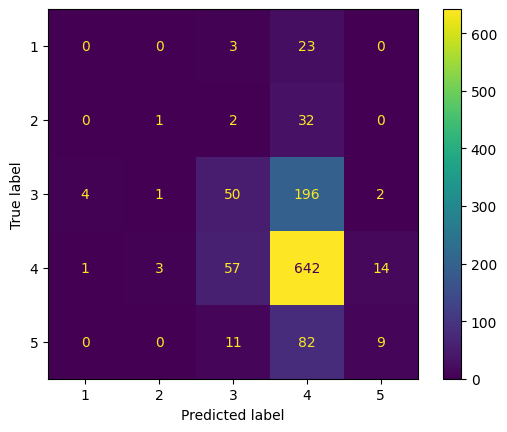

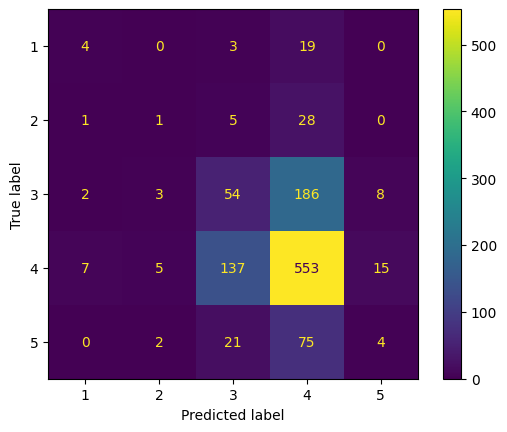

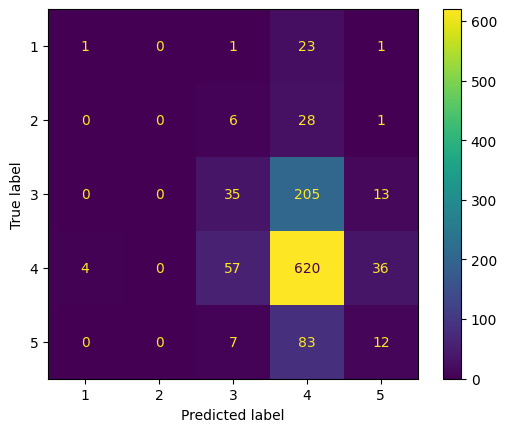

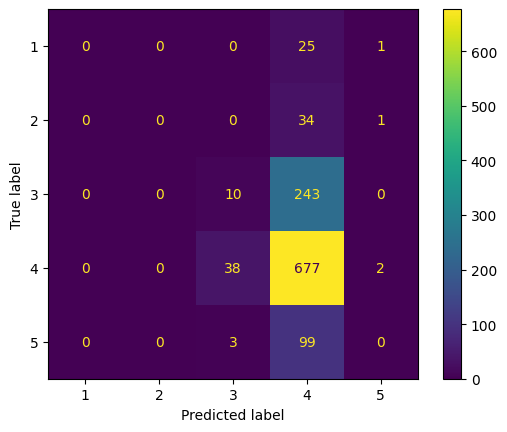

In [148]:

balanced = []
accuracy = []
f1 = []
for model in models:
    print(str(model))
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    #Balanced acuurancy
    balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
    balanced.append(round(balanced_accurancy, 2))
    print(balanced_accurancy)

    #Clasification report
    report = classification_report(Y_test, Y_pred, output_dict=True)
    accur = report['accuracy']
    accuracy.append(round(accur, 2))
    
    # macro_precision =  report['macro avg']['precision'] 
    # macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']
    f1.append(round(macro_f1, 2))
    
    #metric = [weight_accuracy, macro_precision, macro_recall, macro_f1]
    #metrics.append(metric)

    #Confiusion Matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()


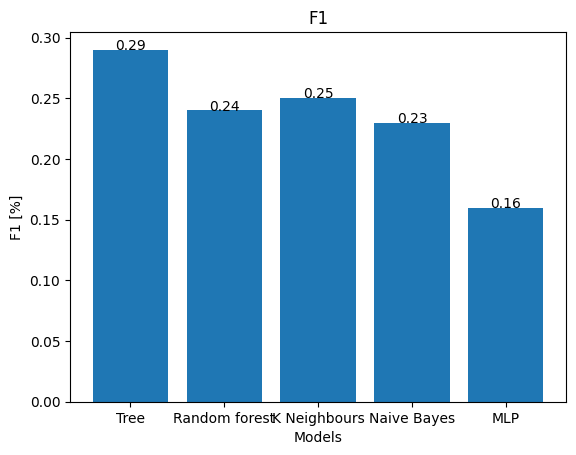

In [149]:
print_balanced_accuracy(f1, 'F1', 'F1 [%]')

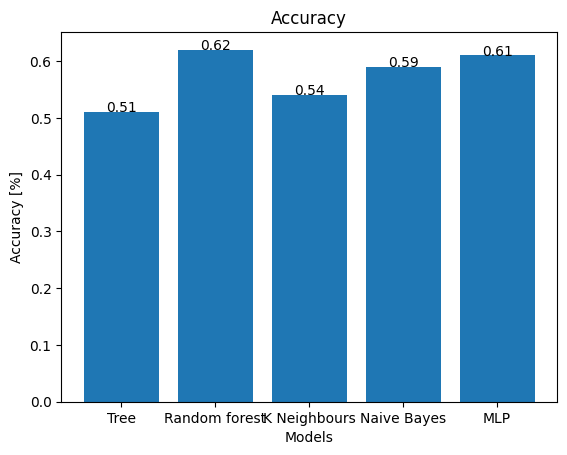

In [150]:
print_balanced_accuracy(accuracy, 'Accuracy', 'Accuracy [%]')

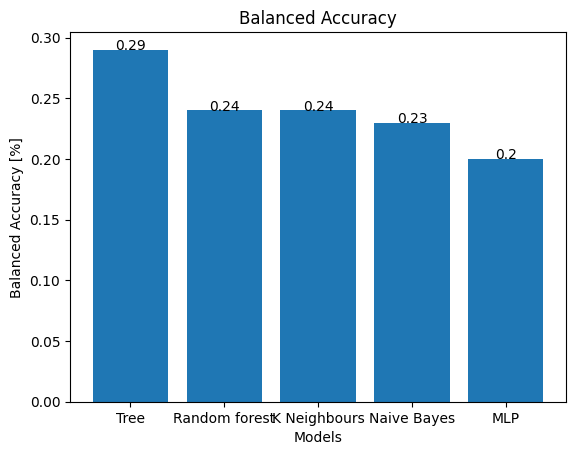

In [151]:
print_balanced_accuracy(balanced, 'Balanced Accuracy',  'Balanced Accuracy [%]')

DecisionTreeClassifier(class_weight='balanced')
0.2797422316792241
              precision    recall  f1-score   support

           1       0.21      0.23      0.22        26
           2       0.07      0.09      0.08        35
           3       0.27      0.27      0.27       253
           4       0.67      0.67      0.67       717
           5       0.15      0.14      0.14       102

    accuracy                           0.51      1133
   macro avg       0.28      0.28      0.28      1133
weighted avg       0.51      0.51      0.51      1133

RandomForestClassifier(class_weight='balanced')
0.2634350484024638
              precision    recall  f1-score   support

           1       0.12      0.04      0.06        26
           2       0.08      0.03      0.04        35
           3       0.37      0.29      0.33       253
           4       0.67      0.80      0.73       717
           5       0.27      0.16      0.20       102

    accuracy                           0.59      11

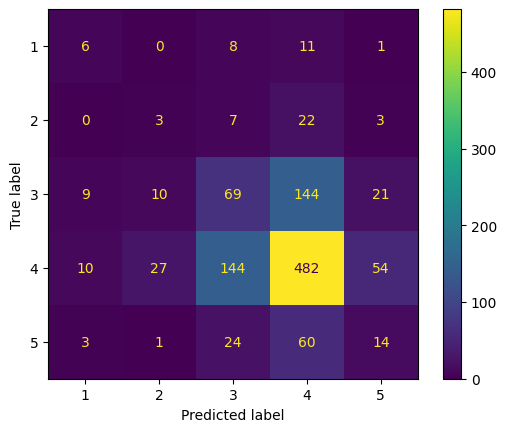

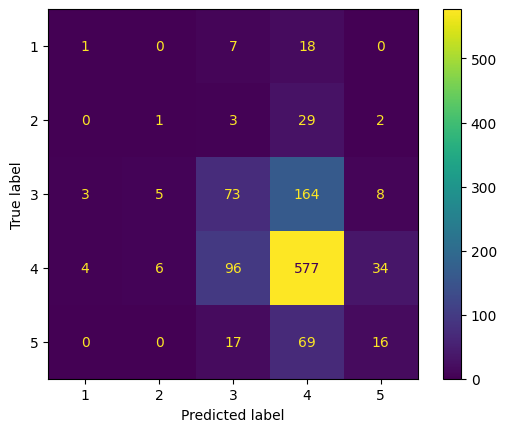

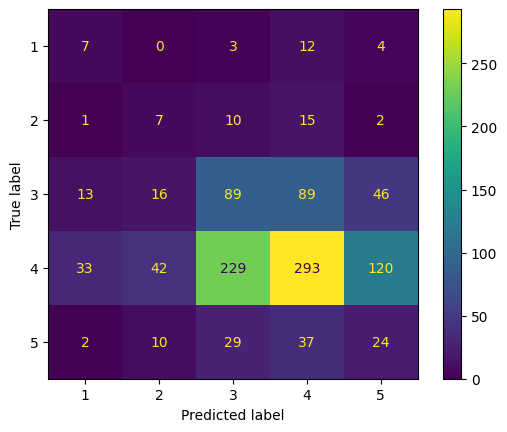

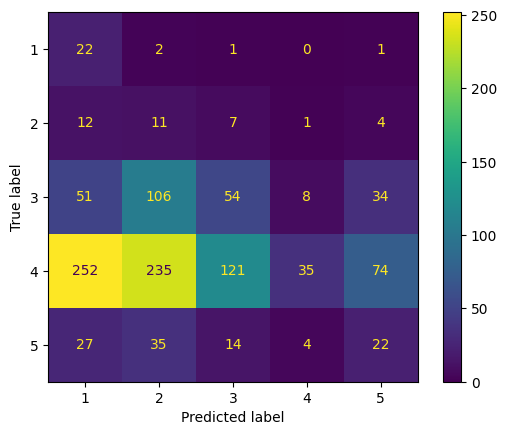

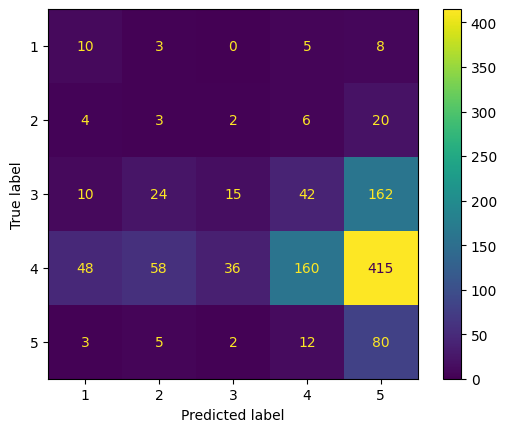

In [152]:
#IMBALANCED DATA
#USAGE OF RANDOM OVER SAMPLER

ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

balanced_random_over_sampler = []

for model in models:
    print(str(model))
    model.fit(X_resampled, Y_resampled)
    Y_pred = model.predict(X_test)

    #Balanced acuurancy
    balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
    balanced_random_over_sampler.append(round(balanced_accurancy, 2))
    print(balanced_accurancy)

    #Clasification report
    print(classification_report(Y_test, Y_pred))

    #Confiusion Matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()


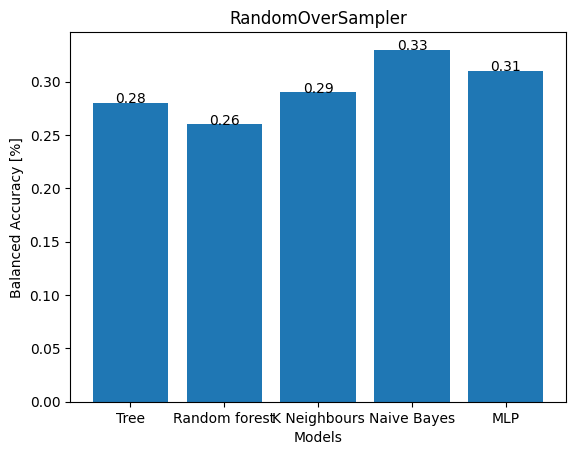

In [153]:
print_balanced_accuracy(balanced_random_over_sampler, 'RandomOverSampler',  'Balanced Accuracy [%]')

DecisionTreeClassifier(class_weight='balanced')
0.2899317829491507
              precision    recall  f1-score   support

           1       0.17      0.23      0.20        26
           2       0.06      0.11      0.07        35
           3       0.27      0.30      0.29       253
           4       0.68      0.60      0.64       717
           5       0.18      0.21      0.19       102

    accuracy                           0.47      1133
   macro avg       0.27      0.29      0.28      1133
weighted avg       0.51      0.47      0.49      1133

RandomForestClassifier(class_weight='balanced')
0.31498085245412666
              precision    recall  f1-score   support

           1       0.20      0.27      0.23        26
           2       0.06      0.06      0.06        35
           3       0.37      0.30      0.33       253
           4       0.68      0.74      0.71       717
           5       0.26      0.22      0.24       102

    accuracy                           0.56      1

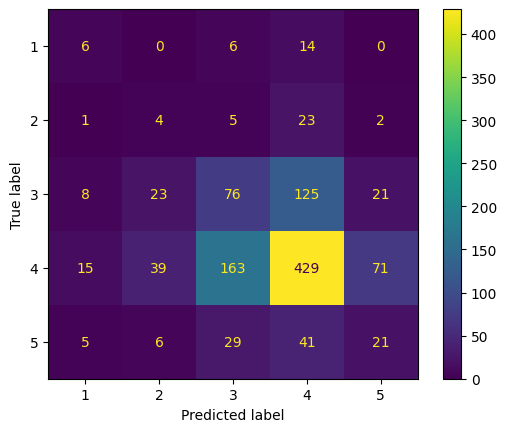

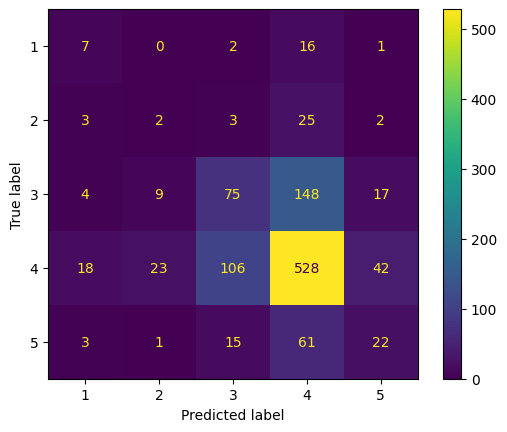

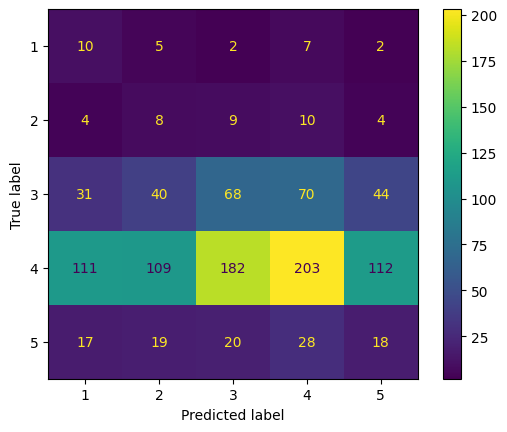

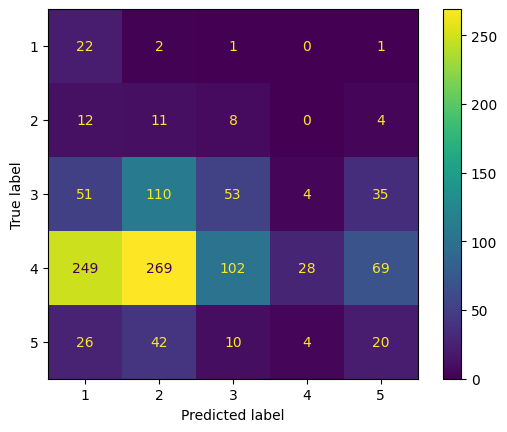

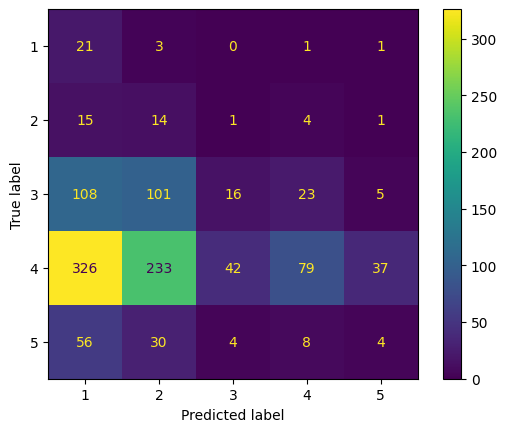

In [154]:
#SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X_train, Y_train)
balanced_smote = []

for model in models:
    print(str(model))
    model.fit(X_resampled, Y_resampled)
    Y_pred = model.predict(X_test)

    #Balanced acuurancy
    balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
    balanced_smote.append(round(balanced_accurancy, 2))
    print(balanced_accurancy)

    #Clasification report
    print(classification_report(Y_test, Y_pred))

    #Confiusion Matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()


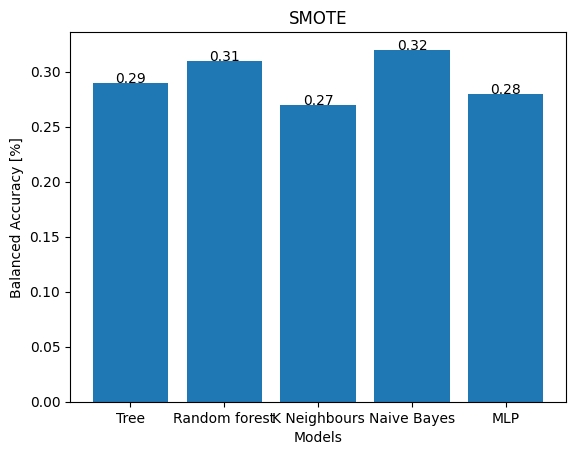

In [155]:
print_balanced_accuracy(balanced_smote, 'SMOTE', 'Balanced Accuracy [%]')

DecisionTreeClassifier(class_weight='balanced')
0.3136111175936107
              precision    recall  f1-score   support

           1       0.23      0.42      0.30        26
           2       0.05      0.09      0.06        35
           3       0.29      0.31      0.30       253
           4       0.67      0.60      0.64       717
           5       0.14      0.15      0.15       102

    accuracy                           0.48      1133
   macro avg       0.28      0.31      0.29      1133
weighted avg       0.51      0.48      0.49      1133

RandomForestClassifier(class_weight='balanced')
0.31272211571026964
              precision    recall  f1-score   support

           1       0.23      0.31      0.26        26
           2       0.06      0.06      0.06        35
           3       0.36      0.31      0.33       253
           4       0.69      0.73      0.71       717
           5       0.20      0.16      0.18       102

    accuracy                           0.56      1

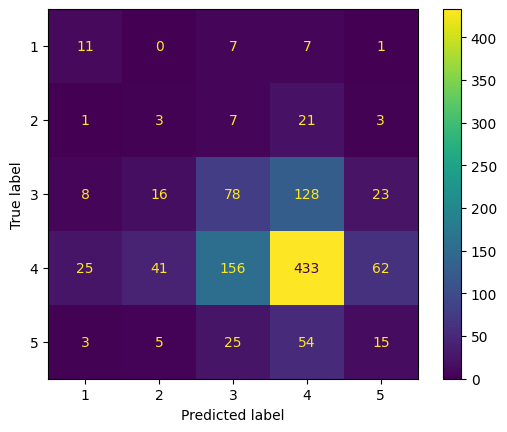

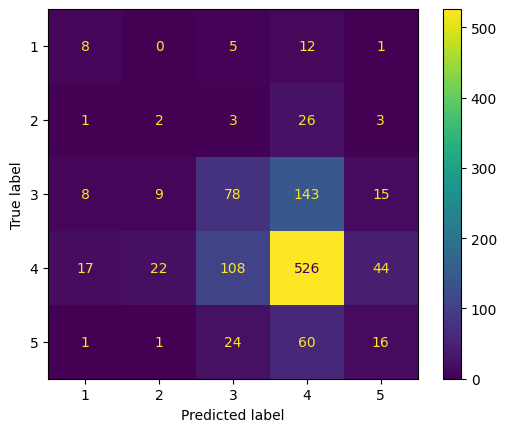

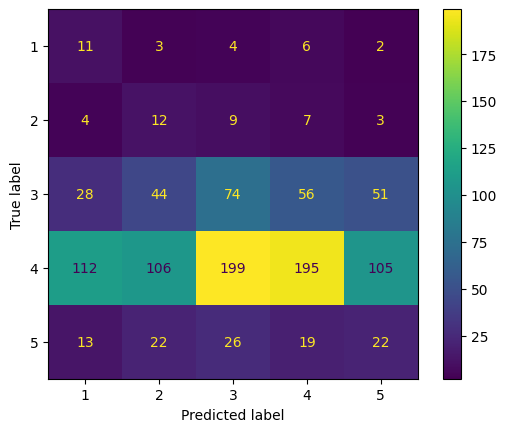

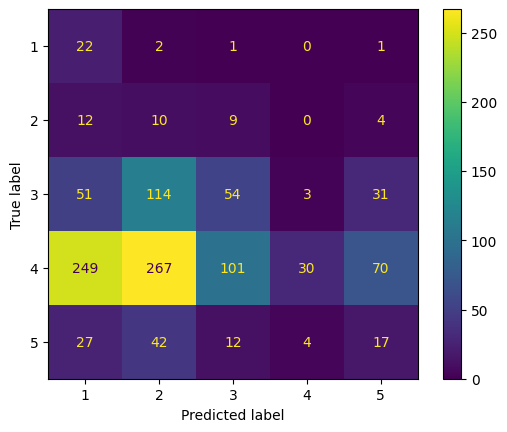

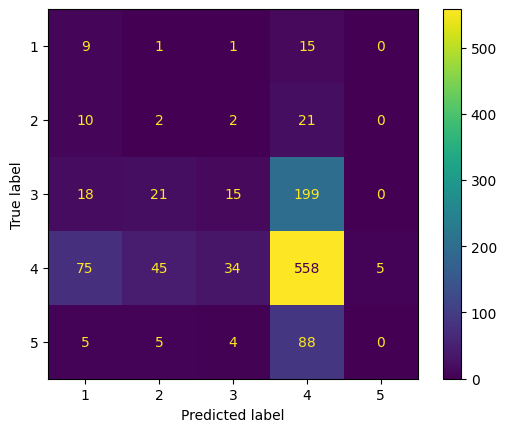

In [156]:
#ADASYN

X_resampled, Y_resampled = ADASYN().fit_resample(X_train, Y_train)
balanced_adasyn = []

for model in models:
    print(str(model))
    model.fit(X_resampled, Y_resampled)
    Y_pred = model.predict(X_test)

    #Balanced acuurancy
    balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
    balanced_adasyn.append(round(balanced_accurancy, 2))
    print(balanced_accurancy)

    #Clasification report
    print(classification_report(Y_test, Y_pred))

    #Confiusion Matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()


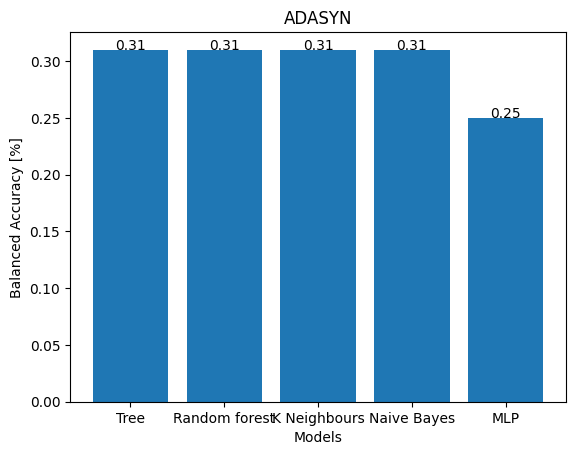

In [157]:
print_balanced_accuracy(balanced_adasyn, 'ADASYN', 'Balanced Accuracy [%]')

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.3418218793195519
              precision    recall  f1-score   support

           1       0.18      0.31      0.23        26
           2       0.11      0.17      0.13        35
           3       0.35      0.35      0.35       253
           4       0.69      0.65      0.67       717
           5       0.22      0.23      0.22       102

    accuracy                           0.52      1133
   macro avg       0.31      0.34      0.32      1133
weighted avg       0.54      0.52      0.53      1133



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.3224632840932641
              precision    recall  f1-score   support

           1       0.20      0.35      0.25        26
           2       0.09      0.09      0.09        35
           3       0.34      0.29      0.31       253
           4       0.68      0.73      0.70       717
           5       0.20      0.17      0.18       102

    accuracy                           0.55      1133
   macro avg       0.30      0.32      0.31      1133
weighted avg       0.54      0.55      0.54      1133



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.3022442276090791
              precision    recall  f1-score   support

           1       0.07      0.42      0.12        26
           2       0.07      0.31      0.11        35
           3       0.24      0.26      0.25       253
           4       0.69      0.30      0.42       717
           5       0.10      0.22      0.13       102

    accuracy                           0.29      1133
   macro avg       0.23      0.30      0.21      1133
weighted avg       0.50      0.29      0.34      1133



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.31231293470482757
              precision    recall  f1-score   support

           1       0.06      0.85      0.11        26
           2       0.02      0.29      0.04        35
           3       0.31      0.20      0.24       253
           4       0.81      0.04      0.08       717
           5       0.15      0.19      0.16       102

    accuracy                           0.12      1133
   macro avg       0.27      0.31      0.13      1133
weighted avg       0.60      0.12      0.12      1133



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.349157045980982
              precision    recall  f1-score   support

           1       0.06      0.65      0.11        26
           2       0.10      0.14      0.12        35
           3       0.34      0.19      0.24       253
           4       0.68      0.33      0.45       717
           5       0.14      0.43      0.22       102

    accuracy                           0.31      1133
   macro avg       0.26      0.35      0.23      1133
weighted avg       0.52      0.31      0.36      1133



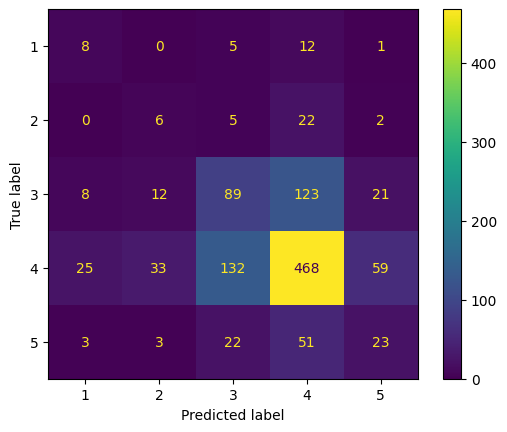

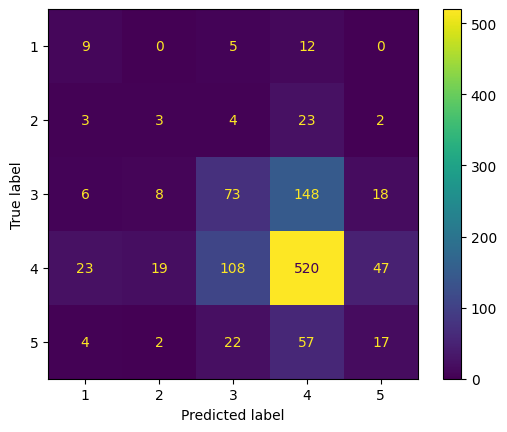

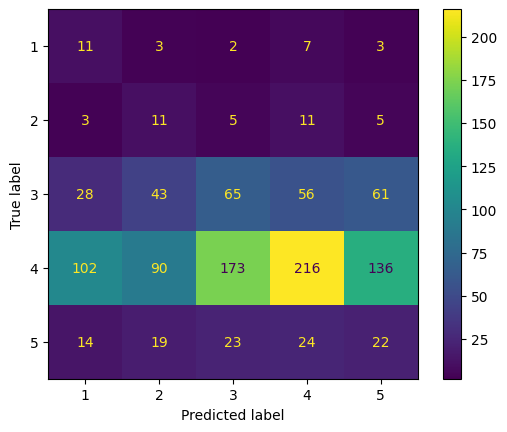

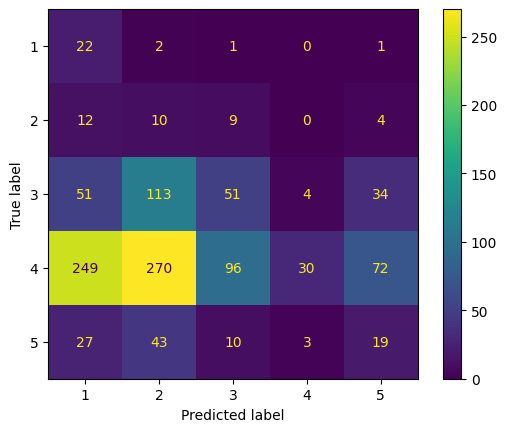

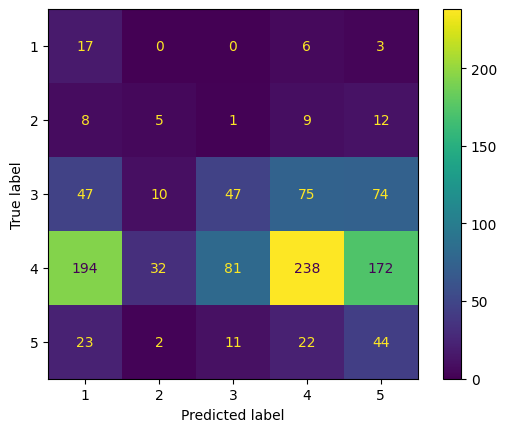

In [158]:
balanced_bbc = []
for model in models:
    bbc = BalancedBaggingClassifier(base_estimator=model,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
    bbc.fit(X_resampled, Y_resampled)
    Y_pred = bbc.predict(X_test)

    #Balanced acuurancy
    balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
    balanced_bbc.append(round(balanced_accurancy, 2))
    print(balanced_accurancy)

    #Clasification report
    print(classification_report(Y_test, Y_pred))

    #Confiusion Matrix
    cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()
    


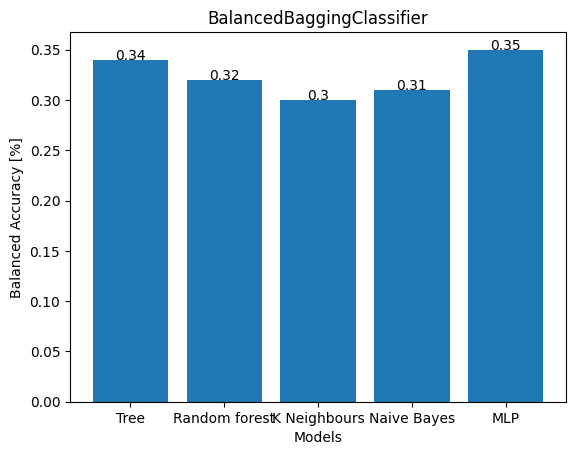

In [159]:
print_balanced_accuracy(balanced_bbc, 'BalancedBaggingClassifier', 'Balanced Accuracy [%]')
